In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
from image_extractor import DataSetup
data = DataSetup()

OS: Windows
0 :  overall_geometry
1 :  overall_rgb
2 :  overall_hsv
3 :  color_grid
4 :  glcm_grid
5 :  comp_hsv
6 :  lbp_hist
7 :  haralick
8 :  red_haralick
9 :  blue_haralick


In [2]:
data.concat(dataID=[0, 5, 6, 7, 8, 9])
model_dir = 'D:./TF_backup/mlp/2_' + data.model_name
checkpoint_dir = 'D:./TF_checkpoint/mlp/weight/'
print(model_dir)

input_shape = (data.length,)
batch_size = 8

model_checkpoint = keras.callbacks.ModelCheckpoint(
    checkpoint_dir,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
)

x_test size: (1260, 267)
x_train size: (7140, 267)
y_test size: (1260, 14)
y_train size: (7140, 14)
Model name = ' overall_geometry_comp_hsv_lbp_hist_haralick_red_haralick_blue_haralick.h5 '
D:./TF_backup/mlp/2_overall_geometry_comp_hsv_lbp_hist_haralick_red_haralick_blue_haralick.h5


In [12]:
normalizer = layers.Normalization()
normalizer.adapt(data.x_train)

# Define model
input_layer = layers.Input(shape=input_shape)
norm = normalizer(input_layer)
den1 = layers.Dense(512, activation='tanh', kernel_initializer='HeNormal')(norm)
drop1 = layers.Dropout(0.3)(den1)
den2 = layers.Dense(512, activation='tanh', kernel_initializer='HeNormal')(drop1)
drop2 = layers.Dropout(0.3)(den2)
den3 = layers.Dense(512, activation='tanh', kernel_initializer='HeNormal')(drop2)
drop3 = layers.Dropout(0.3)(den3)
# den4 = layers.Dense(512, activation='tanh', kernel_initializer='HeNormal')(drop3)
# drop4 = layers.Dropout(0.2)(den4)
den5 = layers.Dense(14, activation='softmax')(drop3)
model = keras.Model(input_layer, den5)

model.compile(
    optimizer="adam", 
    loss="categorical_crossentropy", 
    metrics=["accuracy"]
    )

# model = keras.models.load_model(model_dir)

In [4]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 267)]             0         
                                                                 
 normalization (Normalizatio  (None, 267)              535       
 n)                                                              
                                                                 
 dense (Dense)               (None, 512)               137216    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                             

In [13]:
epochs = 20
history = model.fit(data.x_train, data.y_train, batch_size=8, shuffle=True, epochs=epochs, callbacks=[model_checkpoint])
model.save(model_dir)

Epoch 1/20
893/893 [==============================] - 5s 5ms/step - loss: 1.1617 - accuracy: 0.6178
Epoch 2/20
893/893 [==============================] - 4s 4ms/step - loss: 0.7543 - accuracy: 0.7345
Epoch 3/20
893/893 [==============================] - 4s 4ms/step - loss: 0.6683 - accuracy: 0.7612
Epoch 4/20
893/893 [==============================] - 4s 4ms/step - loss: 0.6013 - accuracy: 0.7859
Epoch 5/20
893/893 [==============================] - 4s 4ms/step - loss: 0.5515 - accuracy: 0.8031
Epoch 6/20
893/893 [==============================] - 4s 5ms/step - loss: 0.5282 - accuracy: 0.8125
Epoch 7/20
893/893 [==============================] - 4s 4ms/step - loss: 0.4692 - accuracy: 0.8291
Epoch 8/20
893/893 [==============================] - 4s 4ms/step - loss: 0.4631 - accuracy: 0.8382
Epoch 9/20
893/893 [==============================] - 4s 4ms/step - loss: 0.4554 - accuracy: 0.8382
Epoch 10/20
893/893 [==============================] - 4s 5ms/step - loss: 0.4407 - accuracy: 0.8436

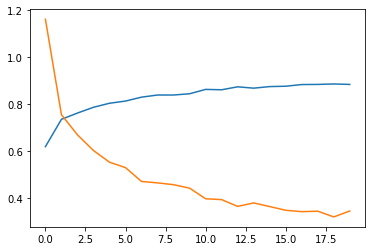

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])

In [15]:
score = model.evaluate(data.x_test, data.y_test, verbose=1)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

40/40 [==============================] - 0s 5ms/step - loss: 1.1686 - accuracy: 0.7151
Test loss: 1.1685855388641357
Test accuracy: 0.7150793671607971


0
Agglutinated 2 Brittle
Agglutinated 3 Brittle
Agglutinated 4 Brittle
Agglutinated 25 Moldered
Agglutinated 26 Moldered
Agglutinated 27 Moldered
Agglutinated 28 Moldered
Agglutinated 43 Brittle
Agglutinated 51 Plated_White
Agglutinated 53 Plated_White
Agglutinated 54 Plated_White
Agglutinated 80 Brittle
Agglutinated 85 Plated_Brown
Agglutinated 86 Moldered
Agglutinated 87 Brittle
Agglutinated 88 Moldered
Agglutinated 89 Moldered
Agglutinated 90 Brittle
1
Brittle 5 Agglutinated
Brittle 6 Agglutinated
Brittle 7 Moldered
Brittle 14 Agglutinated
Brittle 32 Flattened
Brittle 37 Agglutinated
Brittle 38 Agglutinated
Brittle 39 Agglutinated
Brittle 40 Agglutinated
Brittle 41 Agglutinated
Brittle 42 Agglutinated
Brittle 43 Agglutinated
Brittle 44 Agglutinated
Brittle 45 Agglutinated
Brittle 46 Agglutinated
Brittle 47 Agglutinated
Brittle 48 Agglutinated
Brittle 49 Flattened
Brittle 50 Flattened
Brittle 53 Flattened
Brittle 54 Flattened
Brittle 69 Plated_Brown
Brittle 71 Plated_Brown
Brittle 72

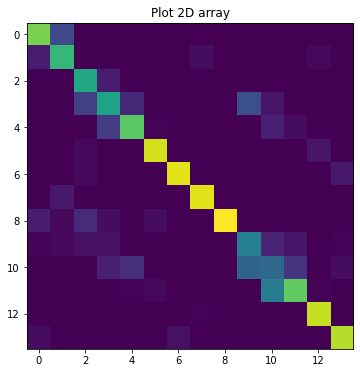

In [23]:
classes_name = ['Agglutinated', 'Brittle', 'Compartmentalized_Brown', 'Compartmentalized_PartiallyPurple', 'Compartmentalized_Purple', 'Compartmentalized_Slaty', 'Compartmentalized_White', 'Flattened', 'Moldered', 'Plated_Brown', 'Plated_PartiallyPurple', 'Plated_Purple', 'Plated_Slaty', 'Plated_White']

i = 0
cmatrix = np.zeros((14,14), dtype=np.int16)
bat = int(len(data.x_test)/14)
n=0
for i in range(0, len(data.x_test),bat):
    print(n)
    result = model.predict_on_batch(data.x_test[i:i+bat])
    ans = data.y_test[i:i+bat]
    for j in range(bat):
        id1 = np.argmax(result[j])
        id2 = np.argmax(ans[j])
        cmatrix[id1, id2] = cmatrix[id1][id2] + 1
        if (id1!=id2):
            print(classes_name[int(n)], j+1, classes_name[id1])
    n=n+1

cmatrix = np.absolute(cmatrix)
# print(repr(cmatrix))

fig = plt.figure(figsize=(6,6))
plt.imshow(cmatrix)
plt.title("Plot 2D array")
plt.show()

In [16]:
acc = []
for i in range(14):
    acc.append(np.round(cmatrix[i][i]/120,3))
    print(classes_name[i] + ': \t \t' + str(acc[i]))
print(np.mean(acc))

Agglutinated: 	 	0.65
Brittle: 	 	0.483
Compartmentalized_Brown: 	 	0.525
Compartmentalized_PartiallyPurple: 	 	0.408
Compartmentalized_Purple: 	 	0.542
Compartmentalized_Slaty: 	 	0.7
Compartmentalized_White: 	 	0.717
Flattened: 	 	0.717
Moldered: 	 	0.733
Plated_Brown: 	 	0.417
Plated_PartiallyPurple: 	 	0.283
Plated_Purple: 	 	0.633
Plated_Slaty: 	 	0.7
Plated_White: 	 	0.683
0.5850714285714286
